In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import openmensa

In [3]:
pd.plotting.register_matplotlib_converters()
sns.set(style="darkgrid")

In [222]:
meals = openmensa.load_csvs("*_2012-07-01_2020-02-07.csv")
meals.tail()

,mensa_id,date,meal_id,name,category,price_student,notes
32076,Mo's Diner,2020-02-05,4893797,Kürbisragout mit Vollkornreis und Rucola,Menü II vegetarisch,3.15,['Sesam']
32077,Mo's Diner,2020-02-06,4893798,Rindfleischpfanne Chili con Carne,Menü I,3.15,"['Milch', 'glutenhaltiges Getreide', 'Sellerie..."
32078,Mo's Diner,2020-02-06,4894395,Süßkartoffeltaschen mit Frischkäsefüllung dazu...,Menü II vegetarisch,3.10,"['Milch', 'glutenhaltiges Getreide', 'Sellerie..."
32079,Mo's Diner,2020-02-07,4893800,Hausgemachte Frikadelle mit Kartoffelpüree und...,Menü I,3.25,"['Rind/Kalb', 'glutenhaltiges Getreide', 'mit ..."
32080,Mo's Diner,2020-02-07,4893801,Zwei gebackene Hetaxkäse mit Joghurt-Dip,Menü II vegetarisch,3.45,"['Milch', 'glutenhaltiges Getreide', 'Eier']"


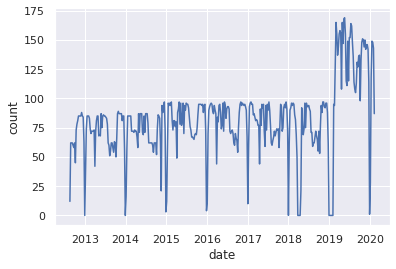

In [245]:
overview = meals.resample("W-Mon", on="date").size().to_frame(name="count").reset_index()
sns.lineplot(x="date", y="count", data=overview)

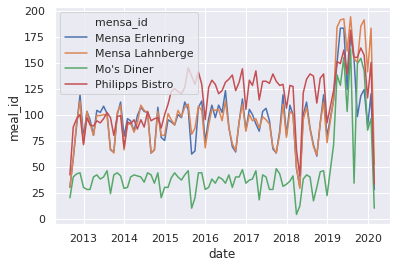

In [281]:
overview = meals.groupby(['mensa_id', pd.Grouper(key='date', freq='M')]).count()["meal_id"].reset_index()
sns.lineplot(x="date", y="meal_id", hue="mensa_id", data=overview)

In [199]:
# filter outliner with price > 9k
meals = meals[meals.price_student.le(10)]
meals["mensa_category"] = meals["mensa_id"].map(str) + ", " + meals["category"]

meals["price_mean"] = meals["price_student"].rolling(50).mean()

/nix/store/080d00lmzfnxwpnpka5fzcckwvdh14sx-python3-3.7.5-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/nix/store/080d00lmzfnxwpnpka5fzcckwvdh14sx-python3-3.7.5-env/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


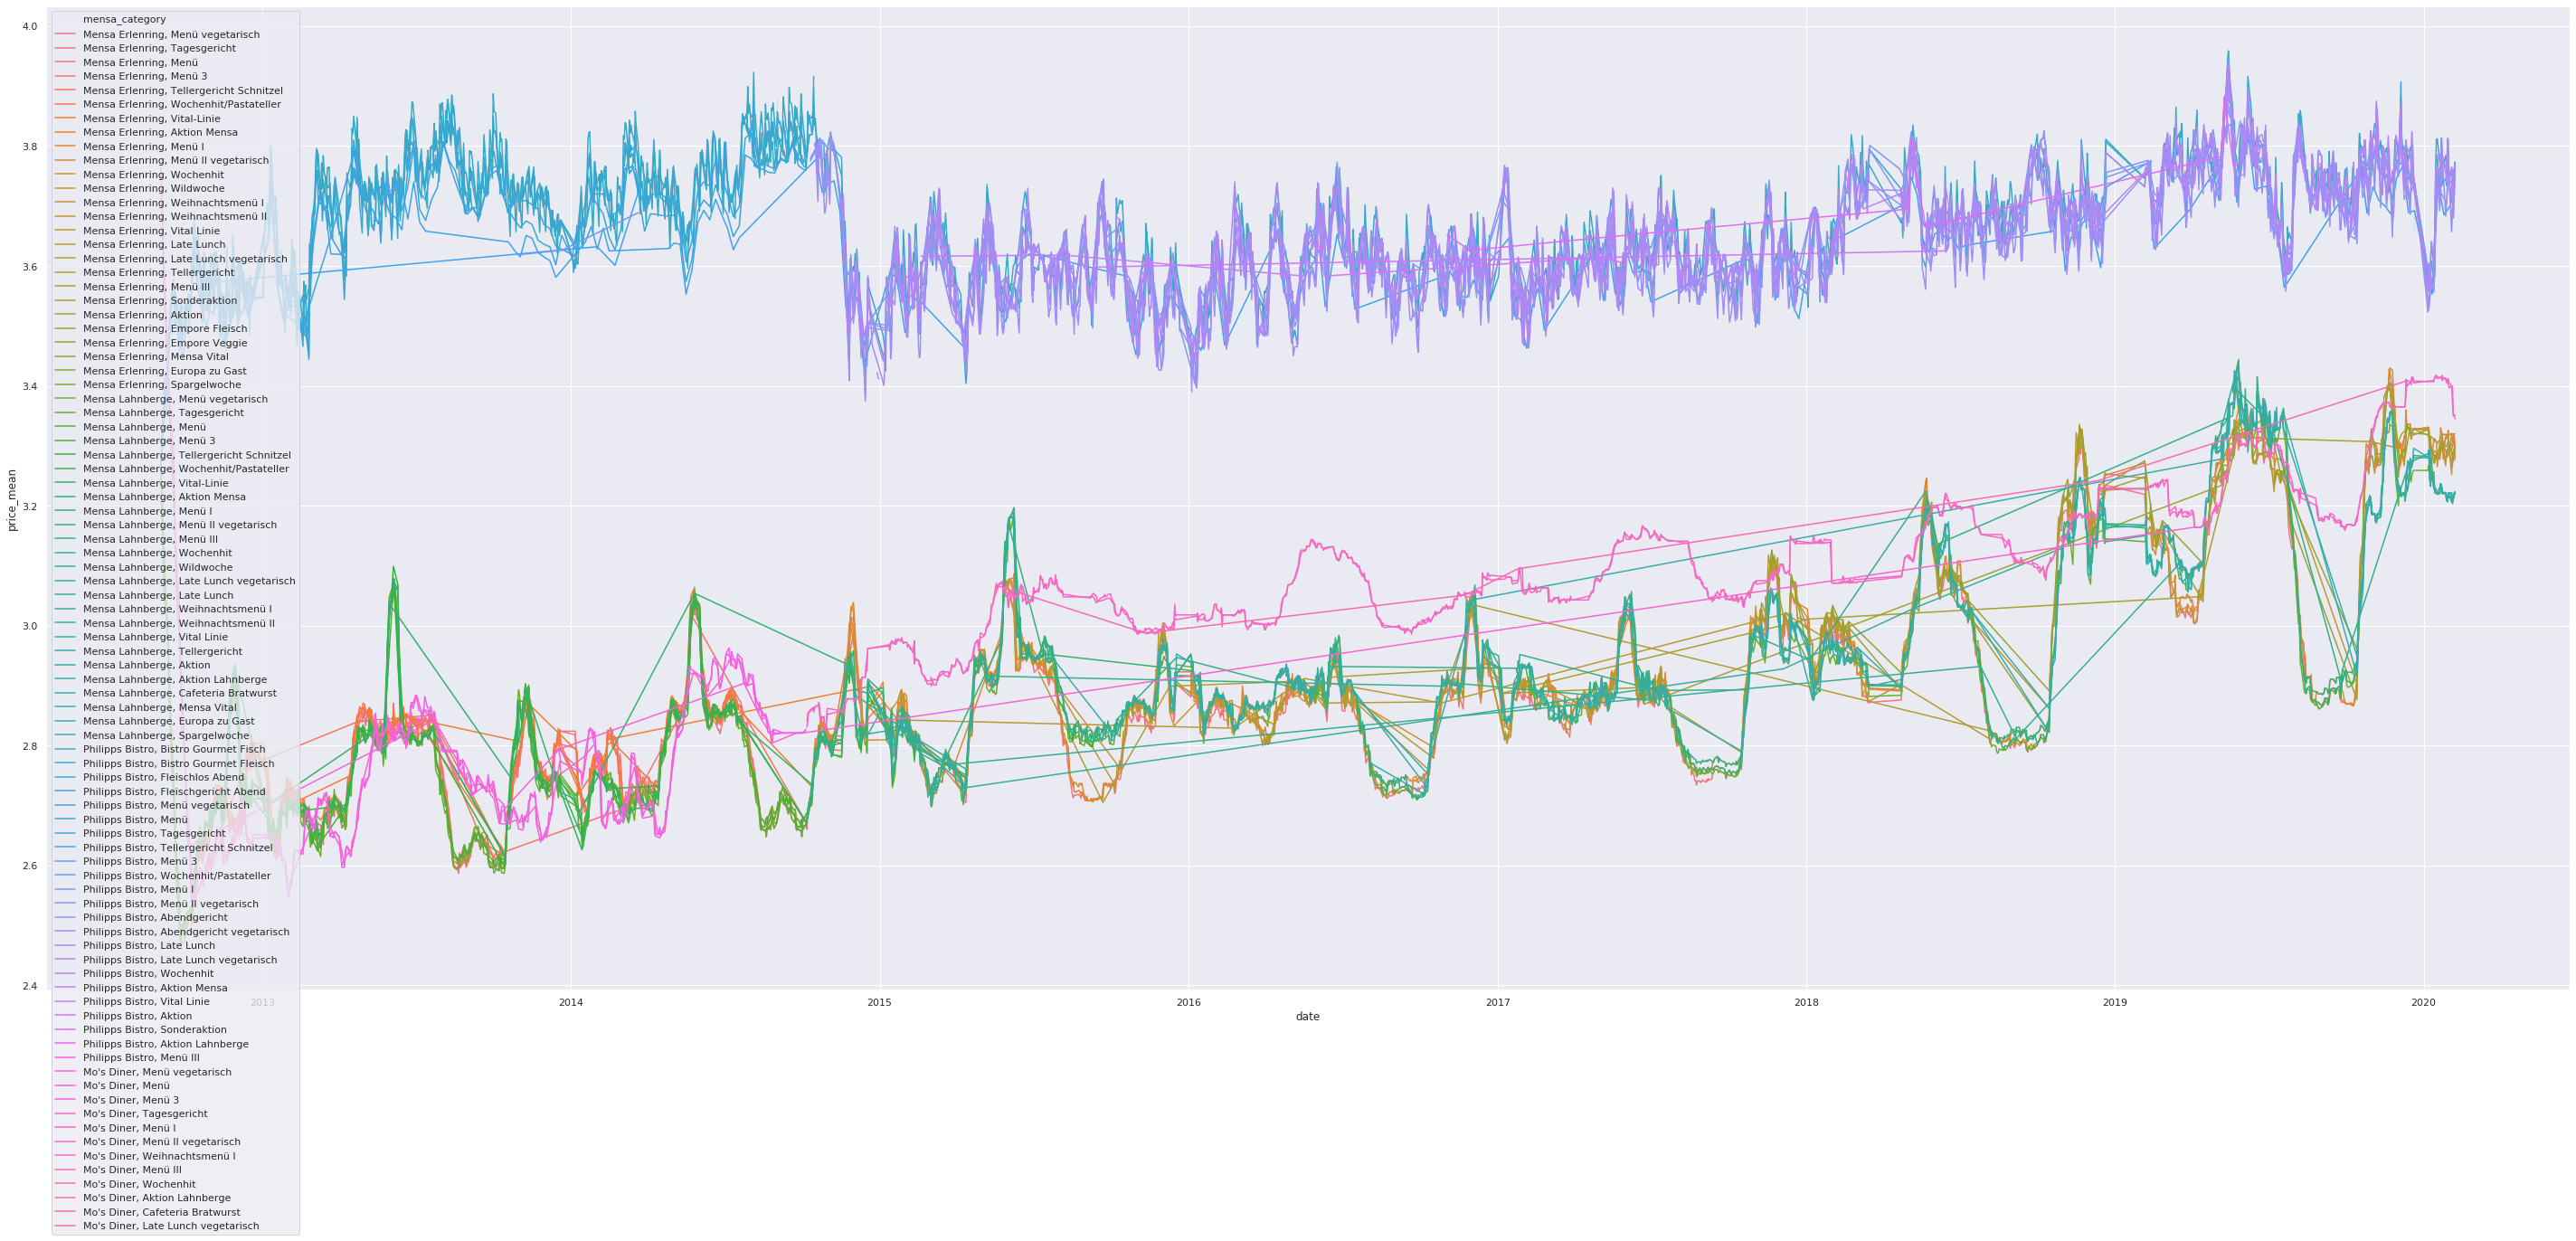

In [5]:
plt.figure(figsize=(50, 20))
sns.lineplot(x="date", y="price_mean", hue="mensa_category", data=meals)